In [ ]:
from pandas import read_csv, merge, DataFrame, concat
from numpy import unique

In [ ]:
dict_fm_map = {
    'Poor adherence to specified constraints': '1.1 Poor task constraint compliance',
    'Misalignment between internal thoughts and response message': '1.2 Inconsistency between reasoning and action',
    'Failure to detect ambiguity / contradictions': '1.3 Undetected conversation ambiguity and contradictions',
    'Proceed with incorrect assumptions': '1.4 Fail to elicit clarification',
    'Fail to elicit clarification': 'Fail to elicit clarification',
    'Unaware of stopping conditions': '1.5 Unaware of stopping conditions',
    'Redundant conversation turns for iterative tasks rather than batching': '2.1 Unbatched Repeat Task Execution',
    'Step repetition': '2.2 Step Repetition',
    'Discontinued reasoning': '2.3 Backtracking Interruption',
    'Trajectory restart': '2.4 Conversation reset',
    'Derailing from task objectives': '2.5 Derailment from task',
    'Tendency to overachieve': '2.6 Disobey role specification',
    'Difficulty in agreeing with agents': '3.1 Disagreements b/w Agents',
    'Withholding relevant information': '3.2 Withholding relevant information',
    'Ignoring good suggestions from other agent': '3.3 Ignoring suggestions from other agent',
    'Waiting on agents to discover known insights for increased confidence': '3.4 Waiting for known information',
    'Claiming that a task is done while it is not true.': '4.1 Premature Conversation Termination',
    'Evaluator agent fails to be critical': '4.2 Lack of critical verification',
    'No attempt to verify outcome': '4.3 Lack of result verification'
}

dict_fmfc_map = {
    '3.1 Disagreements b/w Agents': 'Inter-Agent Coordination Gaps',
    '3.3 Ignoring suggestions from other agent': 'Inter-Agent Coordination Gaps',
    '3.4 Waiting for known information': 'Inter-Agent Coordination Gaps',
    '3.2 Withholding relevant information': 'Inter-Agent Coordination Gaps',
    '2.3 Backtracking Interruption': 'Organizational Breakdown',
    '2.4 Conversation reset': 'Organizational Breakdown',
    '2.5 Derailment from task': 'Organizational Breakdown',
    '2.6 Disobey role specification': 'Organizational Breakdown',
    '2.2 Step Repetition': 'Organizational Breakdown',
    '2.1 Unbatched Repeat Task Execution': 'Organizational Breakdown',
    '1.4 Fail to elicit clarification': 'Specification Ambiguity and Misalignment',
    '1.2 Inconsistency between reasoning and action': 'Specification Ambiguity and Misalignment',
    '1.1 Poor task constraint compliance': 'Specification Ambiguity and Misalignment',
    '1.5 Unaware of stopping conditions': 'Specification Ambiguity and Misalignment',
    '1.3 Undetected conversation ambiguity and contradictions': 'Specification Ambiguity and Misalignment',
    '4.2 Lack of critical verification': 'Weak Verification and Quality Control Failures',
    '4.3 Lack of result verification': 'Weak Verification and Quality Control Failures',
    '4.1 Premature Conversation Termination': 'Weak Verification and Quality Control Failures'
}

In [ ]:
df = read_csv('lm_annotation_gpt4o_and_claude.csv')
del df["Unnamed: 0"], df["annotating_model"], df["llm_annotation"], df["err_area"]
print(df.shape)
df = df.drop_duplicates()
df['err_key'] = df['err_key'].replace(dict_fm_map)
df['err_area'] = df['err_key'].replace(dict_fmfc_map)
df = df.loc[df["err_key"].isin(dict_fmfc_map.keys()), :]
print(df.shape)
df

(6732, 4)
(2736, 5)


,trace,mas_name,err_key,human,err_area
0,https://github.com/LakshyAAAgrawal/MultiAgentF...,HyperAgent,1.3 Undetected conversation ambiguity and cont...,True,Specification Ambiguity and Misalignment
1,https://github.com/LakshyAAAgrawal/MultiAgentF...,HyperAgent,1.4 Fail to elicit clarification,False,Specification Ambiguity and Misalignment
3,https://github.com/LakshyAAAgrawal/MultiAgentF...,HyperAgent,2.6 Disobey role specification,False,Organizational Breakdown
5,https://github.com/LakshyAAAgrawal/MultiAgentF...,HyperAgent,3.2 Withholding relevant information,False,Inter-Agent Coordination Gaps
6,https://github.com/LakshyAAAgrawal/MultiAgentF...,HyperAgent,2.5 Derailment from task,False,Organizational Breakdown
...,...,...,...,...,...
3359,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,4.1 Premature Conversation Termination,False,Weak Verification and Quality Control Failures
3360,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,3.3 Ignoring suggestions from other agent,False,Inter-Agent Coordination Gaps
3361,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,2.3 Backtracking Interruption,False,Organizational Breakdown
3362,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,2.4 Conversation reset,False,Organizational Breakdown


In [ ]:
df["err_area"].drop_duplicates()

,err_area
0,Specification Ambiguity and Misalignment
3,Organizational Breakdown
5,Inter-Agent Coordination Gaps
11,Weak Verification and Quality Control Failures


In [ ]:
list_melissa = [
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/Checkers_DefaultOrganization_20250117123319/Checkers_DefaultOrganization_20250117123319.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/Checkers_DefaultOrganization_20250117123319/Checkers_DefaultOrganization_20250117123319.log", "3.3 Ignoring suggestions from other agent"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/Checkers_DefaultOrganization_20250117123319/Checkers_DefaultOrganization_20250117123319.log", "1.3 Undetected conversation ambiguity and contradictions"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/WebCalculator_DefaultOrganization_20250117122957/WebCalculator_DefaultOrganization_20250117122957.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/UCBerkeleyWebsite_DefaultOrganization_20250117122732/UCBerkeleyWebsite_DefaultOrganization_20250117122732.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/GoldMiner_DefaultOrganization_20250117122233/GoldMiner_DefaultOrganization_20250117122233.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/TextBasedSpaceInvaders_DefaultOrganization_20250117121911/TextBasedSpaceInvaders_DefaultOrganization_20250117121911.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/EpisodeChooseYourStory_DefaultOrganization_20250117121024/EpisodeChooseYourStory_DefaultOrganization_20250117121024.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/EpisodeChooseYourStory_DefaultOrganization_20250117121024/EpisodeChooseYourStory_DefaultOrganization_20250117121024.log", "1.4 Fail to elicit clarification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/EpisodeChooseYourStory_DefaultOrganization_20250117121024/EpisodeChooseYourStory_DefaultOrganization_20250117121024.log", "1.3 Undetected conversation ambiguity and contradictions"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/MonopolyGo_DefaultOrganization_20250117120612/MonopolyGo_DefaultOrganization_20250117120612.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/Tetris_DefaultOrganization_20250117115606/Tetris_DefaultOrganization_20250117115606.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/DouDizhuPoker_DefaultOrganization_20250117115407/DouDizhuPoker_DefaultOrganization_20250117115407.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/DouDizhuPoker_DefaultOrganization_20250117115407/DouDizhuPoker_DefaultOrganization_20250117115407.log", "1.4 Fail to elicit clarification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/DouDizhuPoker_DefaultOrganization_20250117115407/DouDizhuPoker_DefaultOrganization_20250117115407.log", "1.3 Undetected conversation ambiguity and contradictions"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/TriviaQuiz_DefaultOrganization_20250117115215/TriviaQuiz_DefaultOrganization_20250117115215.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/TypingSpeedGame_DefaultOrganization_20250117114818/TypingSpeedGame_DefaultOrganization_20250117114818.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/StrandsNYT_DefaultOrganization_20250117114427/StrandsNYT_DefaultOrganization_20250117114427.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/StrandsNYT_DefaultOrganization_20250117114427/StrandsNYT_DefaultOrganization_20250117114427.log", "1.1 Poor task constraint compliance"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/Sudoku_DefaultOrganization_20250117113643/Sudoku_DefaultOrganization_20250117113643.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/Chess_DefaultOrganization_20250117112345/Chess_DefaultOrganization_20250117112345.log", "4.2 Lack of critical verification"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/WebCalculator_DefaultOrganization_20250117122957/WebCalculator_DefaultOrganization_20250117122957.log", "2.2 Step Repetition"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/UCBerkeleyWebsite_DefaultOrganization_20250117122732/UCBerkeleyWebsite_DefaultOrganization_20250117122732.log", "2.2 Step Repetition"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/TicTacToe_DefaultOrganization_20250117111437/TicTacToe_DefaultOrganization_20250117111437.log", "2.2 Step Repetition"],
["https://github.com/melissa-pan/ChatDev/blob/4o/WareHouse/GoldMiner_DefaultOrganization_20250117122233/GoldMiner_DefaultOrganization_20250117122233.log", "2.2 Step Repetition"]
]

In [ ]:
missing_lines = []
for l in list_melissa:
  if df.loc[(df["trace"] == l[0]) & (df["err_key"] == l[1]), :].shape[0] == 0:
    print(l)
    missing_lines.append({
    "trace": l[0], "mas_name": "ChatDev", "err_key": l[1], "human": True, "err_area": ""
    })
  else:
    df.loc[(df["trace"] == l[0]) & (df["err_key"] == l[1]), ["human"]] = True
df = concat((df, DataFrame(missing_lines))).reset_index()
df['err_area'] = df['err_key'].replace(dict_fmfc_map)

In [ ]:
DataFrame(missing_lines)

""


In [ ]:
df.tail(3)

,index,trace,mas_name,err_key,human,err_area
2733,3361,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,2.3 Backtracking Interruption,False,Organizational Breakdown
2734,3362,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,2.4 Conversation reset,False,Organizational Breakdown
2735,3363,https://github.com/melissa-pan/ChatDev/blob/4o...,ChatDev,2.2 Step Repetition,False,Organizational Breakdown


In [ ]:
df = df.loc[df["mas_name"] != "AppWorld", :]

In [ ]:
df.loc[: ,["err_area", "err_key"]].drop_duplicates().sort_values(["err_area", "err_key"]).reset_index()

,index,err_area,err_key
0,8,Inter-Agent Coordination Gaps,3.1 Disagreements b/w Agents
1,3,Inter-Agent Coordination Gaps,3.2 Withholding relevant information
2,14,Inter-Agent Coordination Gaps,3.3 Ignoring suggestions from other agent
3,5,Inter-Agent Coordination Gaps,3.4 Waiting for known information
4,6,Organizational Breakdown,2.1 Unbatched Repeat Task Execution
5,17,Organizational Breakdown,2.2 Step Repetition
6,15,Organizational Breakdown,2.3 Backtracking Interruption
7,16,Organizational Breakdown,2.4 Conversation reset
8,4,Organizational Breakdown,2.5 Derailment from task
9,2,Organizational Breakdown,2.6 Disobey role specification


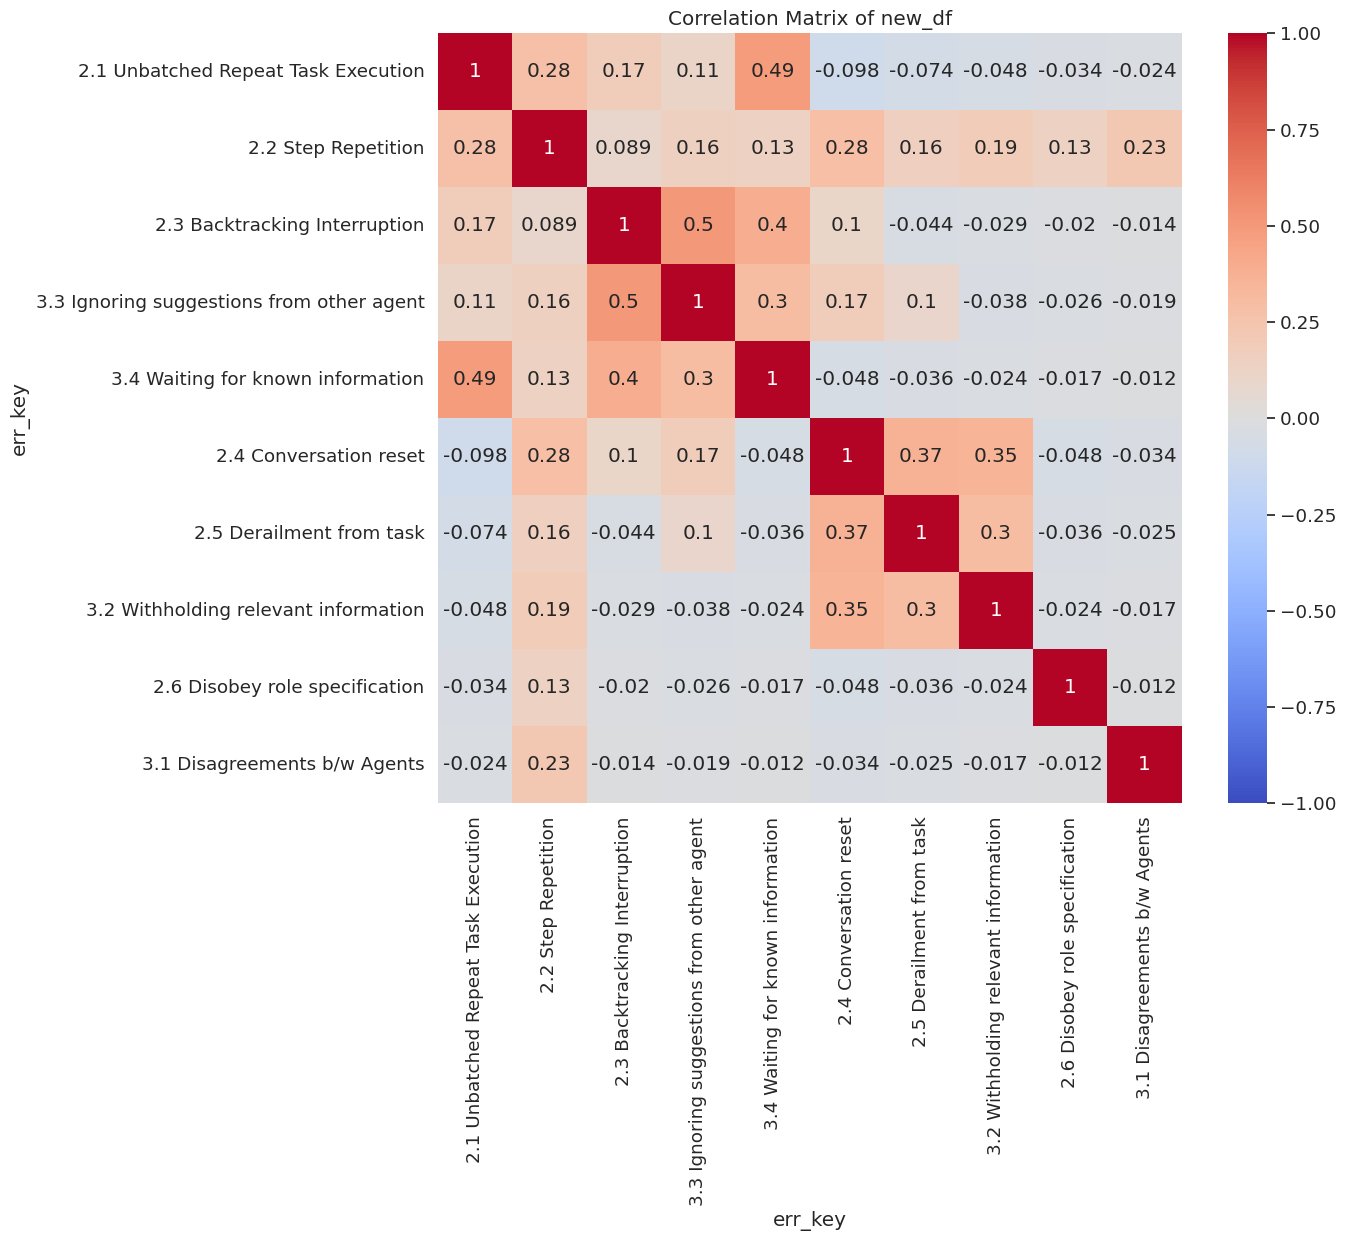

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original dataframe
new_df = df.loc[df["err_area"].isin(["Inter-Agent Coordination Gaps", "Organizational Breakdown"]), :].pivot(index='trace', columns='err_key', values='human').fillna(False)

# Specify the desired order of categories
category_order = [
    "2.1 Unbatched Repeat Task Execution",
    "2.2 Step Repetition",
    "2.3 Backtracking Interruption",
    "3.3 Ignoring suggestions from other agent",
    "3.4 Waiting for known information",
    "2.4 Conversation reset",
    "2.5 Derailment from task",
    "3.2 Withholding relevant information",
    "2.6 Disobey role specification",
    "3.1 Disagreements b/w Agents",
]

# Reorder the columns and index of the correlation matrix
new_df = new_df[category_order]
correlation_matrix = new_df.corr()
correlation_matrix = correlation_matrix.reindex(index=category_order, columns=category_order)

# Increase font size
sns.set(font_scale=1.2)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Matrix of new_df')

# Show the plot
plt.show()

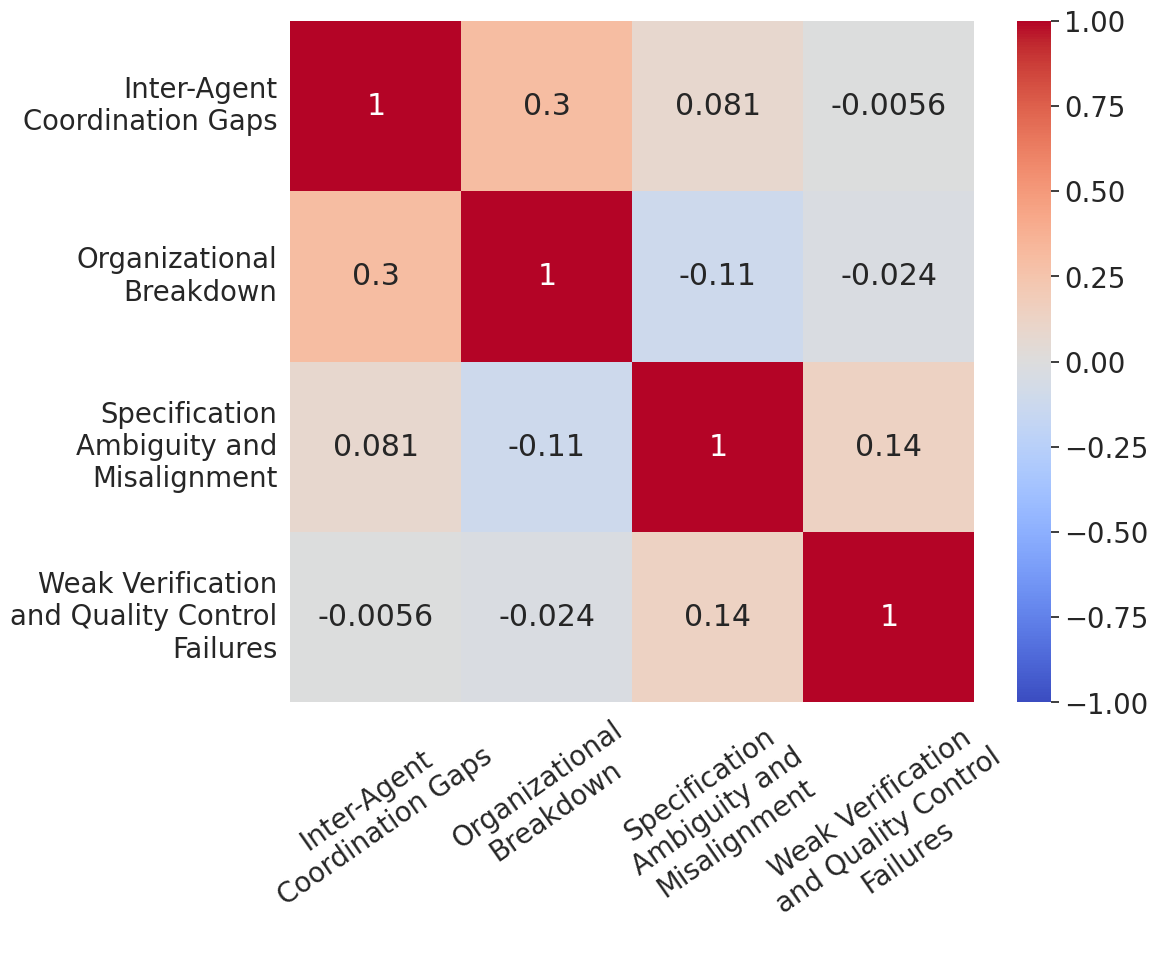

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

new_df = df.groupby(["trace", "err_area"]).agg({"human": "max"}).reset_index().pivot(index='trace', columns='err_area', values='human').fillna(False)

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Increase font size
sns.set(font_scale=1.8)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Function to wrap labels
def wrap_labels(labels, max_width=20):
    return ['\n'.join(textwrap.wrap(l, max_width)) for l in labels]

# Wrap and set x-axis labels
x_labels = wrap_labels(correlation_matrix.columns)
heatmap.set_xticklabels(x_labels, rotation=35, ha='center')
heatmap.set_xlabel('')

# Wrap and set y-axis labels
y_labels = wrap_labels(correlation_matrix.index)
heatmap.set_yticklabels(y_labels, rotation=0, ha='right')
heatmap.set_ylabel('')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig('mas_failure_cat_corr.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
df_g = df.groupby(["mas_name", "err_area", "err_key"]).agg({"human": "sum"}).reset_index()
df_g.columns =  ["mas", "failure_category", "failure_mode", "count"]
df_g

,mas,failure_category,failure_mode,count
0,AG2,Inter-Agent Coordination Gaps,3.1 Disagreements b/w Agents,0
1,AG2,Inter-Agent Coordination Gaps,3.2 Withholding relevant information,0
2,AG2,Inter-Agent Coordination Gaps,3.3 Ignoring suggestions from other agent,1
3,AG2,Inter-Agent Coordination Gaps,3.4 Waiting for known information,0
4,AG2,Organizational Breakdown,2.1 Unbatched Repeat Task Execution,0
...,...,...,...,...
67,MetaGPT,Specification Ambiguity and Misalignment,1.4 Fail to elicit clarification,10
68,MetaGPT,Specification Ambiguity and Misalignment,1.5 Unaware of stopping conditions,0
69,MetaGPT,Weak Verification and Quality Control Failures,4.1 Premature Conversation Termination,3
70,MetaGPT,Weak Verification and Quality Control Failures,4.2 Lack of critical verification,4


In [ ]:
df_g["count"].sum()

189

In [ ]:
df_g.groupby(["mas"]).agg({"count": "sum"}).reset_index()

,mas,count
0,AG2,43
1,ChatDev,40
2,HyperAgent,52
3,MetaGPT,54


In [ ]:
df_g_tmp = df_g.groupby(["failure_category"]).agg({"count": "sum"}).reset_index()
df_g_tmp

,failure_category,count
0,Inter-Agent Coordination Gaps,12
1,Organizational Breakdown,54
2,Specification Ambiguity and Misalignment,52
3,Weak Verification and Quality Control Failures,71


In [ ]:
df_g_tmp["count"] = df_g_tmp["count"] / df_g_tmp["count"].sum() * 100
df_g_tmp

,failure_category,count
0,Inter-Agent Coordination Gaps,6.349206
1,Organizational Breakdown,28.571429
2,Specification Ambiguity and Misalignment,27.513228
3,Weak Verification and Quality Control Failures,37.566138


In [ ]:
dict_cat_perc = {}
for k in df_g_tmp["failure_category"].values:
    dict_cat_perc[k] = round(df_g_tmp.loc[df_g_tmp["failure_category"] == k, "count"].values[0], 1)
dict_cat_perc

{'Inter-Agent Coordination Gaps': 6.3,
 'Organizational Breakdown': 28.6,
 'Specification Ambiguity and Misalignment': 27.5,
 'Weak Verification and Quality Control Failures': 37.6}

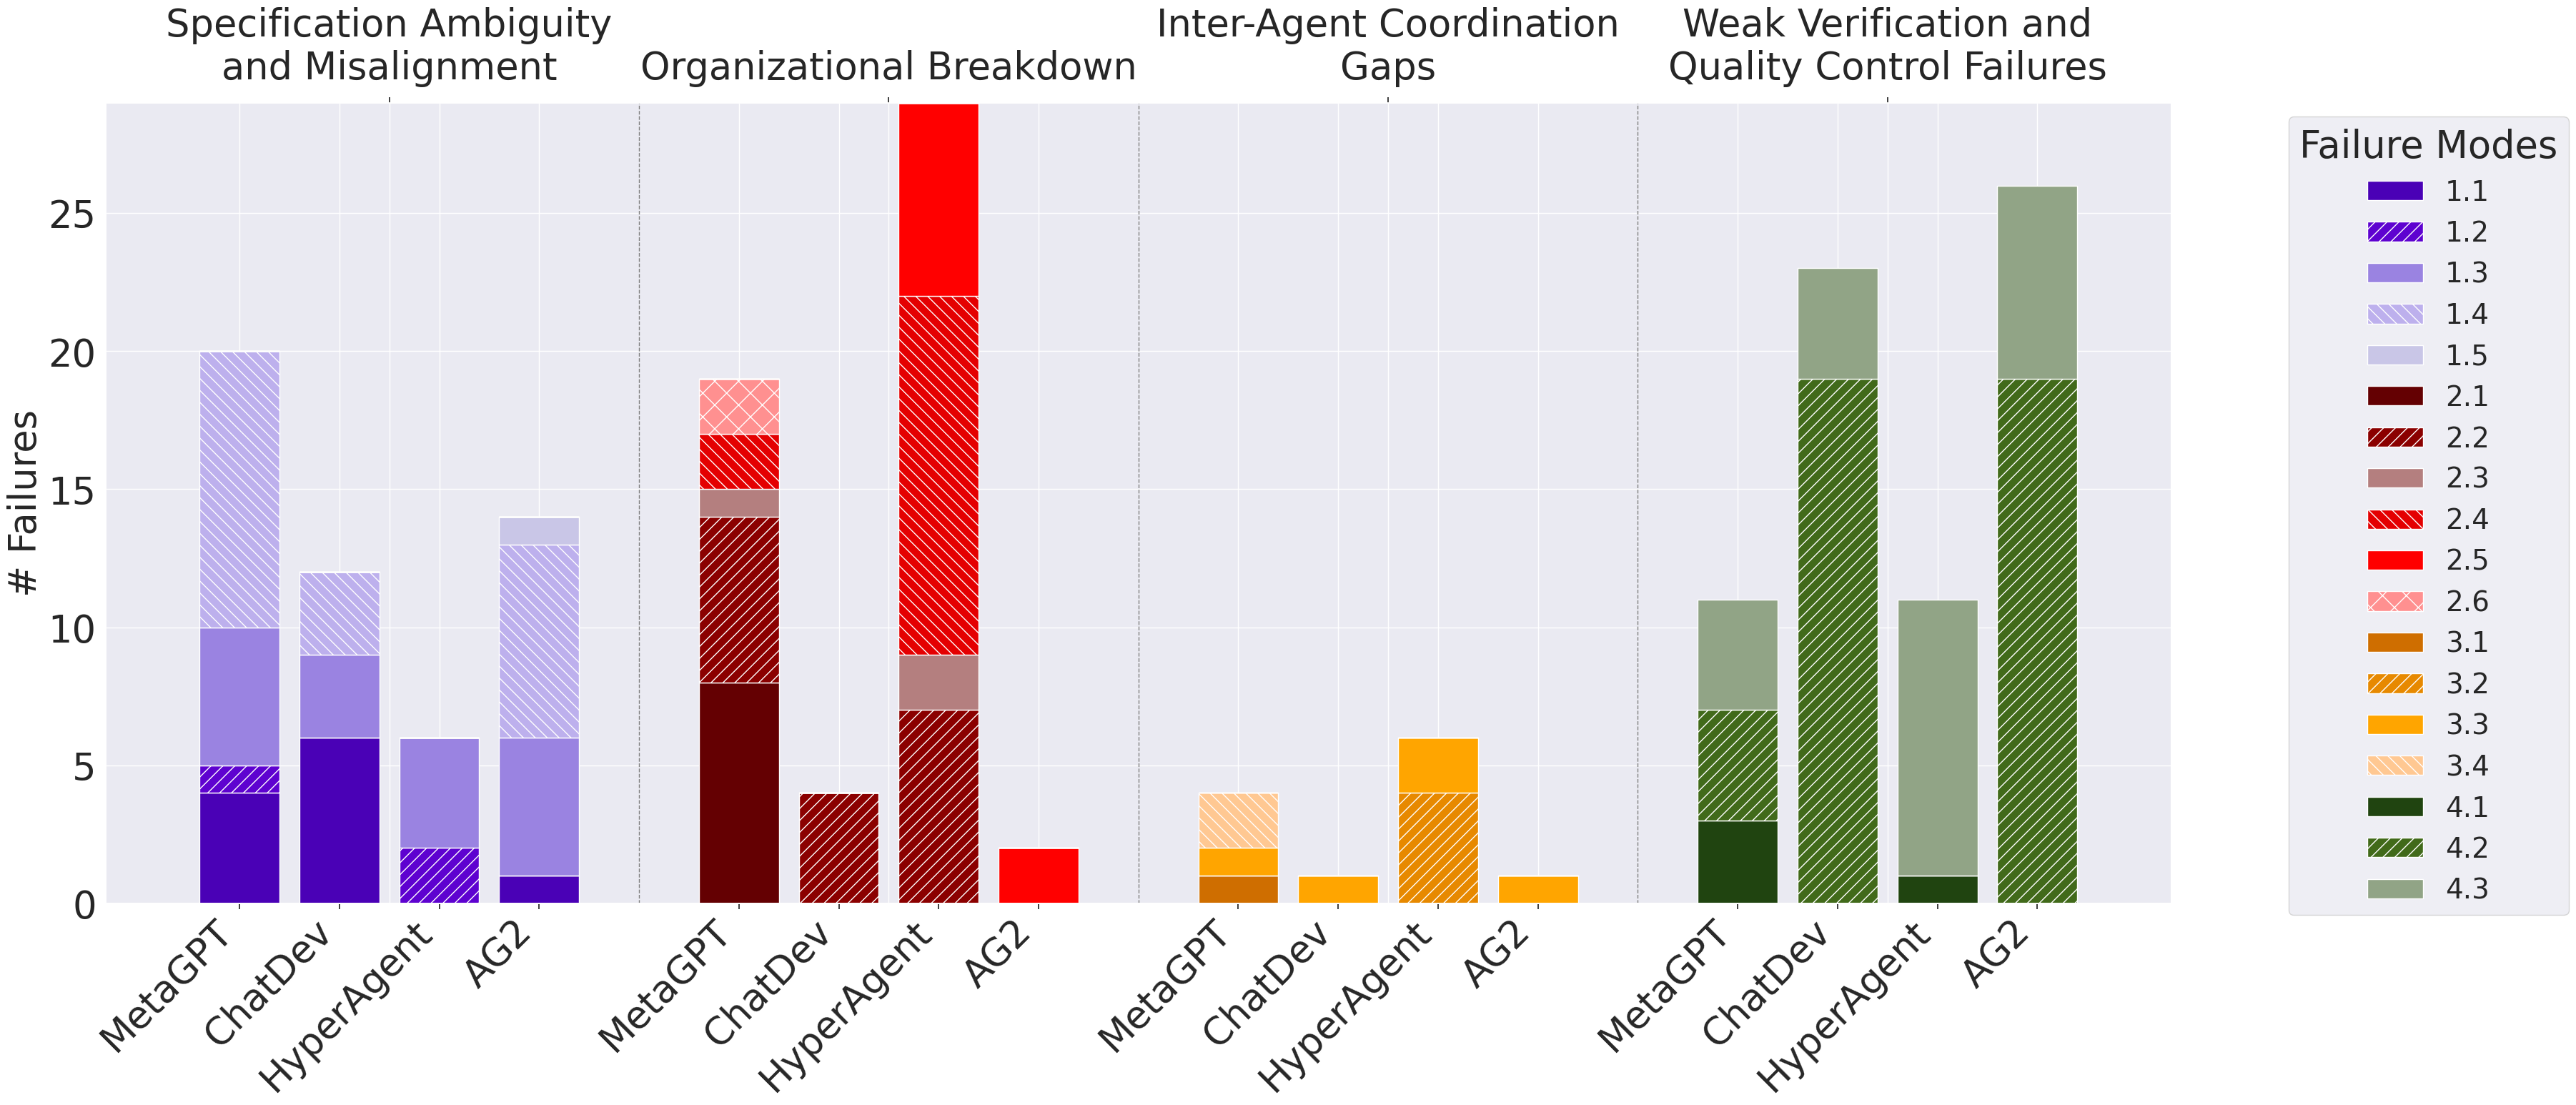

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import textwrap

fontsize = 38

# Assuming df_g is your dataframe
# Pivot the dataframe
df_pivot = df_g.pivot_table(values='count',
                            index=['failure_category', 'mas'],
                            columns='failure_mode',
                            fill_value=0)

# Define the desired order for macro groups and MAS
macro_group_order = [
    "Specification Ambiguity and Misalignment",
    "Organizational Breakdown",
    "Inter-Agent Coordination Gaps",
    "Weak Verification and Quality Control Failures"
]

mas_order = ["MetaGPT", "ChatDev", "HyperAgent", "AppWorld", "AG2"]
mas_order = ["MetaGPT", "ChatDev", "HyperAgent", "AG2"]


# Reorder the index of df_pivot
df_pivot = df_pivot.reindex(macro_group_order, level='failure_category')
df_pivot = df_pivot.reindex(mas_order, level='mas')

# Create the plot
fig, ax = plt.subplots(figsize=(36, 16))  # Even larger figure size

# Get unique categories and MAS values
categories = df_pivot.index.get_level_values('failure_category').unique()
mas_values = df_pivot.index.get_level_values('mas').unique()

# Define color mapping for failure modes
color_mapping = {
    '1.1': '#4a01b6', '1.2': '#5e02d0', '1.3': '#9a83e1', '1.4': '#bdb0ed', '1.5': '#c9c6e7',
    '2.1': '#640002', '2.2': '#8b0000', '2.3': '#b47f7f', '2.4': '#e40001', '2.5': '#ff0000', '2.6': '#ff9090',
    '3.1': '#cf6e00', '3.2': '#e78900', '3.3': '#ffa500', '3.4': '#ffc892',
    '4.1': '#204410', '4.2': '#416a1a', '4.3': '#91a486'
}


# Define hatch styles for failure modes
hatch_styles_mapping = {
    '1.1': '', '1.2': '//', '1.3': '', '1.4': '\\\\', '1.5': '',
    '2.1': '', '2.2': '//', '2.3': '', '2.4': '\\\\', '2.5': '', '2.6': 'x',
    '3.1': '', '3.2': '//', '3.3': '', '3.4': '\\\\',
    '4.1': '', '4.2': '//', '4.3': ''
}

# Set up colors and hatches for failure modes
failure_modes = df_pivot.columns
colors = {mode: color_mapping.get(mode.split()[0], '#CCCCCC') for mode in failure_modes}
hatches = {mode: hatch_styles_mapping.get(mode.split()[0], '#CCCCCC') for mode in failure_modes}

# Calculate positions
group_width = len(mas_order) + 1  # Add space between groups
x = np.arange(0, len(macro_group_order) * group_width, group_width)

# Plot the stacked bars
width = 0.8
for i, cat in enumerate(macro_group_order):
    for j, mas in enumerate(mas_order):
        bottom = 0
        for mode in failure_modes:
            value = df_pivot.loc[(cat, mas), mode] if (cat, mas) in df_pivot.index else 0
            ax.bar(x[i] + j, value, width, bottom=bottom, color=colors[mode],
                   hatch=hatches[mode], edgecolor='white',
                   label=mode if i == 0 and j == 0 else "")
            bottom += value

# Add grey lines between macro groups
for i in range(1, len(macro_group_order)):
    ax.axvline(x=x[i] - 1.0, color='grey', linestyle='--', linewidth=1)

# Customize the plot
ax.set_ylabel('# Failures', fontsize=fontsize)
#ax.set_title('Failure Modes by Category and MAS', fontsize=fontsize+4, pad=50)

# Set x-axis ticks and labels for MAS
ax.set_xticks((x.reshape(-1, 1) + np.arange(len(mas_order))).flatten())
ax.set_xticklabels(np.tile(mas_order, len(macro_group_order)), rotation=45, ha='right', fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

# Function to wrap text
def wrap_text(text, width=26):
    return '\n'.join(textwrap.wrap(text, width))

# Add failure category labels at the top
ax2 = ax.twiny()
ax2.set_xticks(x + (len(mas_order) - 1) / 2)
ax2.set_xticklabels([wrap_text(cat) for cat in macro_group_order], rotation=0, ha='center', fontsize=fontsize)
ax2.set_xlim(ax.get_xlim())
ax2.tick_params(axis='x', which='major', pad=10, labelsize=fontsize)

# Move the top axis to the top of the plot
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')

# Modify the legend to show both color and hatch
handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Rectangle((0,0),1,1, facecolor=colors[label], hatch=hatches[label], edgecolor='white') for label in labels]
ax.legend(new_handles, [_.split(" ")[0] for _ in labels], title='Failure Modes', title_fontsize=fontsize,
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=fontsize-10)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85, bottom=0.15)  # Make room for top labels and legend

plt.savefig('mas_failure_bar.pdf', format='pdf', bbox_inches='tight')

plt.show()

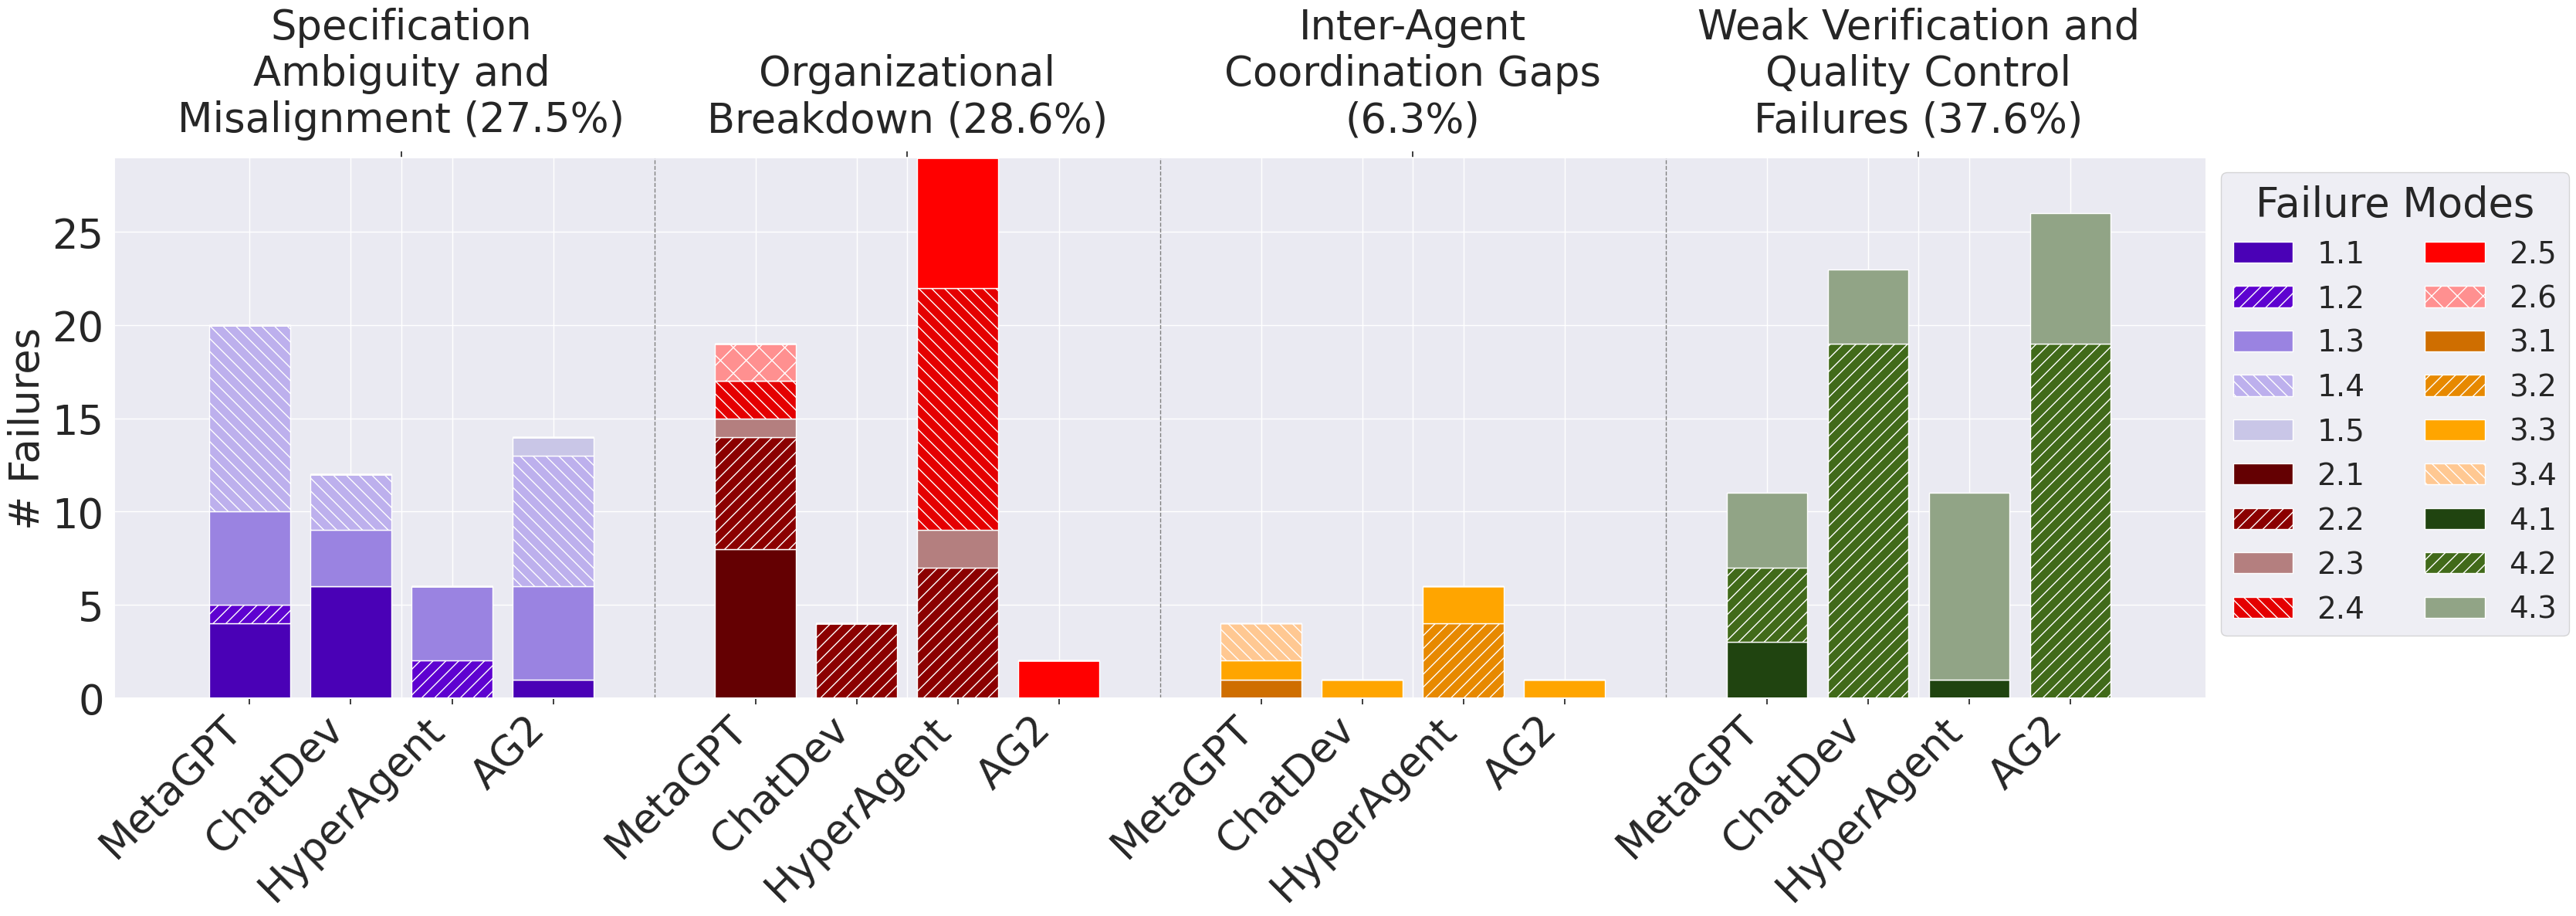

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import textwrap

fontsize = 38

# Assuming df_g is your dataframe
# Pivot the dataframe
df_pivot = df_g.pivot_table(values='count',
                            index=['failure_category', 'mas'],
                            columns='failure_mode',
                            fill_value=0)

# Define the desired order for macro groups and MAS
macro_group_order = [
    "Specification Ambiguity and Misalignment",
    "Organizational Breakdown",
    "Inter-Agent Coordination Gaps",
    "Weak Verification and Quality Control Failures"
]

mas_order = ["MetaGPT", "ChatDev", "HyperAgent", "AG2"]

# Reorder the index of df_pivot
df_pivot = df_pivot.reindex(macro_group_order, level='failure_category')
df_pivot = df_pivot.reindex(mas_order, level='mas')

# Create the plot
fig, ax = plt.subplots(figsize=(36, 10))  # Even larger figure size

# Get unique categories and MAS values
categories = df_pivot.index.get_level_values('failure_category').unique()
mas_values = df_pivot.index.get_level_values('mas').unique()

# Define color mapping for failure modes
color_mapping = {
    '1.1': '#4a01b6', '1.2': '#5e02d0', '1.3': '#9a83e1', '1.4': '#bdb0ed', '1.5': '#c9c6e7',
    '2.1': '#640002', '2.2': '#8b0000', '2.3': '#b47f7f', '2.4': '#e40001', '2.5': '#ff0000', '2.6': '#ff9090',
    '3.1': '#cf6e00', '3.2': '#e78900', '3.3': '#ffa500', '3.4': '#ffc892',
    '4.1': '#204410', '4.2': '#416a1a', '4.3': '#91a486'
}

# Define hatch styles for failure modes
hatch_styles_mapping = {
    '1.1': '', '1.2': '//', '1.3': '', '1.4': '\\\\', '1.5': '',
    '2.1': '', '2.2': '//', '2.3': '', '2.4': '\\\\', '2.5': '', '2.6': 'x',
    '3.1': '', '3.2': '//', '3.3': '', '3.4': '\\\\',
    '4.1': '', '4.2': '//', '4.3': ''
}

# Set up colors and hatches for failure modes
failure_modes = df_pivot.columns
colors = {mode: color_mapping.get(mode.split()[0], '#CCCCCC') for mode in failure_modes}
hatches = {mode: hatch_styles_mapping.get(mode.split()[0], '#CCCCCC') for mode in failure_modes}

# Calculate positions
group_width = len(mas_order) + 1  # Add space between groups
x = np.arange(0, len(macro_group_order) * group_width, group_width)

# Plot the stacked bars
width = 0.8
for i, cat in enumerate(macro_group_order):
    for j, mas in enumerate(mas_order):
        bottom = 0
        for mode in failure_modes:
            value = df_pivot.loc[(cat, mas), mode] if (cat, mas) in df_pivot.index else 0
            ax.bar(x[i] + j, value, width, bottom=bottom, color=colors[mode],
                   hatch=hatches[mode], edgecolor='white',
                   label=mode if i == 0 and j == 0 else "")
            bottom += value

# Add grey lines between macro groups
for i in range(1, len(macro_group_order)):
    ax.axvline(x=x[i] - 1.0, color='grey', linestyle='--', linewidth=1)

# Customize the plot
ax.set_ylabel('# Failures', fontsize=fontsize)

# Set x-axis ticks and labels for MAS
ax.set_xticks((x.reshape(-1, 1) + np.arange(len(mas_order))).flatten())
ax.set_xticklabels(np.tile(mas_order, len(macro_group_order)), rotation=45, ha='right', fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

# Function to wrap text
def wrap_text(text, width=21):
    return '\n'.join(textwrap.wrap(text, width))

# Add failure category labels at the top
ax2 = ax.twiny()
ax2.set_xticks(x + (len(mas_order) - 1) / 2)
ax2.set_xticklabels([wrap_text(cat + " (" + str(dict_cat_perc[cat]) + "%)") for cat in macro_group_order], rotation=0, ha='center', fontsize=fontsize)
ax2.set_xlim(ax.get_xlim())
ax2.tick_params(axis='x', which='major', pad=10, labelsize=fontsize)

# Move the top axis to the top of the plot
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')

# Modify the legend to show both color and hatch on two rows
handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Rectangle((0,0),1,1, facecolor=colors[label], hatch=hatches[label], edgecolor='white') for label in labels]
ax.legend(new_handles, [_.split(" ")[0] for _ in labels], title='Failure Modes', title_fontsize=fontsize,
          bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=fontsize-10, ncol=2)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.80, bottom=0.15)  # Reduced right margin

plt.savefig('mas_failure_bar.pdf', format='pdf', bbox_inches='tight')

plt.show()



In [ ]:
df_p = df_g.groupby(["failure_mode"]).agg({"count": "sum"}).reset_index()
df_p

,failure_mode,count
0,1.1 Poor task constraint compliance,11
1,1.2 Inconsistency between reasoning and action,3
2,1.3 Undetected conversation ambiguity and cont...,17
3,1.4 Fail to elicit clarification,20
4,1.5 Unaware of stopping conditions,1
5,2.1 Unbatched Repeat Task Execution,8
6,2.2 Step Repetition,17
7,2.3 Backtracking Interruption,3
8,2.4 Conversation reset,15
9,2.5 Derailment from task,9


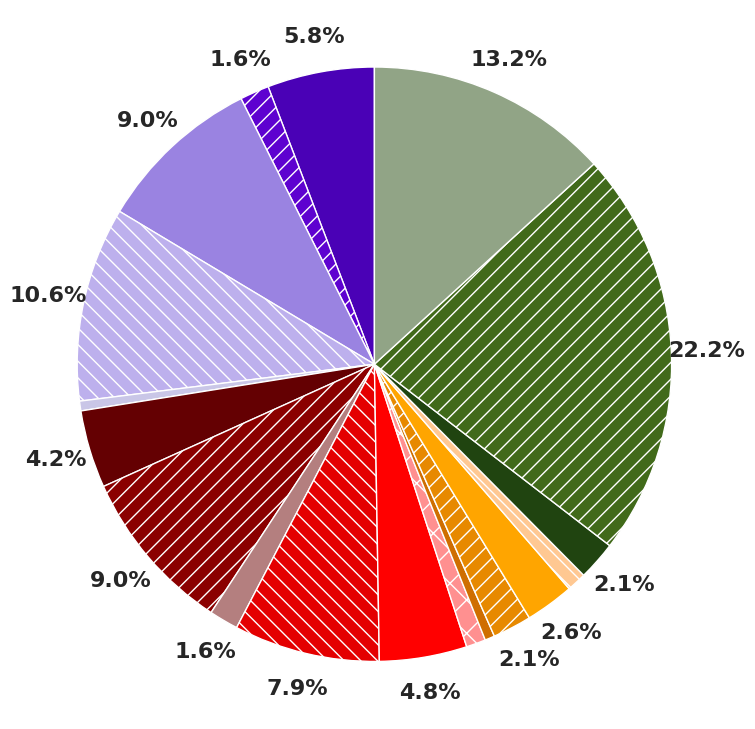

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%' if pct > 1.5 else ''
    return my_autopct

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(df_p['count'],
                                   labels=None,  # Remove labels
                                   colors=[colors[mode] for mode in df_p['failure_mode']],
                                   autopct=make_autopct(df_p['count']),
                                   pctdistance=1.12,    # Closer to the circle
                                   startangle=90,
                                   wedgeprops=dict(edgecolor='white'))

# Add hatches to the wedges
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[df_p['failure_mode'].iloc[i]])

# Modify the percentage text to be outside
plt.setp(autotexts, size=16, weight="bold")

#plt.title('Distribution of Failure Modes\n', fontsize=28)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('mas_failure_pie.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
df_p["percentage"] = df_p["count"] / df_p["count"].sum() * 100
df_p["percentage"] = [round(_, 2) for _ in df_p["percentage"]]
df_p

,failure_mode,count,percentage
0,1.1 Poor task constraint compliance,11,5.82
1,1.2 Inconsistency between reasoning and action,3,1.59
2,1.3 Undetected conversation ambiguity and cont...,17,8.99
3,1.4 Fail to elicit clarification,20,10.58
4,1.5 Unaware of stopping conditions,1,0.53
5,2.1 Unbatched Repeat Task Execution,8,4.23
6,2.2 Step Repetition,17,8.99
7,2.3 Backtracking Interruption,3,1.59
8,2.4 Conversation reset,15,7.94
9,2.5 Derailment from task,9,4.76


In [ ]:
df_p["percentage"].sum()

100.01